In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
print(tf.__version__)



1.13.1


In [3]:
imdb = keras.datasets.imdb

(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

In [4]:
print("Training entrie: {}, lables: {}".format(len(train_data),len(train_labels)))
print(train_data[0])


Training entrie: 25000, lables: 25000


## A function to convert integers into stings

In [5]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

1646592/1641221 [==============================] - 4s 3us/step


In [15]:
for i in range(5):
    print(decode_review(train_data[i]))
    
for i in range(5):
    print(train_labels[i])



<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

## PREPROCESSING
### Pad all the arrays so they all have the same length

In [10]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value = word_index['<PAD>'],
                                                        padding = 'post',
                                                        maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value = word_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=256)
len(train_data[0]), len(train_data[1])


(256, 256)

In [11]:
from pprint import pprint
pprint(train_data[0])


array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

## Build the model
- How many layers to use in the model?
- How many hidden units to use for each layer?


In [13]:
# input shape is the vocabulary count used for the movie reviews(10000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size,16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16,activation=tf.nn.relu))
model.add(keras.layers.Dense(1,activation=tf.nn.sigmoid))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


## Add loss function and optimizer


In [16]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics=['acc'])



### Seperate 10000 examples out of the training data as the validation set


In [18]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

## Trian the model
- epoch: the process in which all the data are went through
- batch_size: the size of data that is trained each time

In [19]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 40,
                    batch_size = 512,
                    validation_data = (x_val,y_val),
                    verbose = 1)

Train on 15000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/40
15000/15000 [==============================] - 2s 164us/sample - loss: 0.6915 - acc: 0.5965 - val_loss: 0.6892 - val_acc: 0.6867
Epoch 2/40
15000/15000 [==============================] - 1s 90us/sample - loss: 0.6844 - acc: 0.7259 - val_loss: 0.6790 - val_acc: 0.7369
Epoch 3/40
15000/15000 [==============================] - 1s 98us/sample - loss: 0.6684 - acc: 0.7564 - val_loss: 0.6590 - val_acc: 0.7536
Epoch 4/40
15000/15000 [==============================] - 1s 97us/sample - loss: 0.6412 - acc: 0.7678 - val_loss: 0.6285 - val_acc: 0.7607
Epoch 5/40
15000/15000 [==============================] - 1s 85us/sample - loss: 0.6027 - acc: 0.7953 - val_loss: 0.5893 - val_acc: 0.7895
Epoch 6/40
15000/15000 [==============================] - 1s 89us/sample - loss: 0.5560 - acc: 0.8170 - val_loss: 0.5451 - val_acc: 0.8095
Epoch 7/40
15000/15000 [==============================] - 1s 94us/s

In [20]:
results = model.evaluate(test_data,test_labels)
print(results)

25000/25000 [==============================] - 2s 76us/sample - loss: 0.3424 - acc: 0.8692
[0.3423907136154175, 0.86924]


## Create a graph of accuracy and loss over time
model.fit() returns a History object that contains a dictionary with everything that happened during training:


In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [22]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

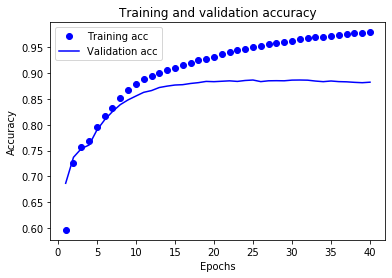

In [23]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()